In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
from leela_interp.core.effect_study import *
from leela_interp.core.alternative_moves import *
from leela_interp.core.double_branch import *
from leela_interp.core.fifth_move_study import *
from leela_interp.core.general_study import *
from leela_interp.core.ablation_study import AblationStudy
from leela_interp.core.probing_study import ProbingStudy
import subprocess
# Disable FutureWarning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
#device = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device("cpu")
model = Lc0sight("lc0.onnx", device=device)

Using device: cpu


# 3rd move analysis

## Residual stream

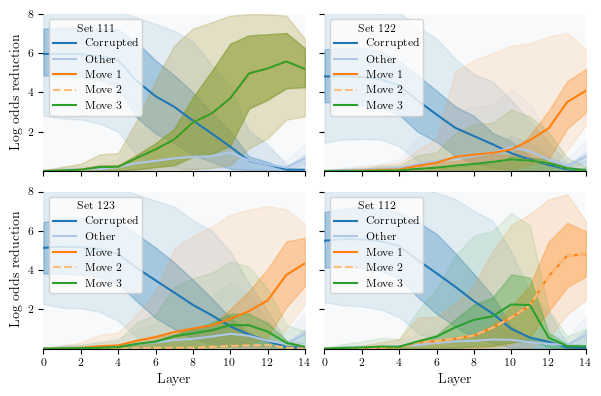

<Figure size 640x480 with 0 Axes>

In [4]:
study = FifthMoveStudy(load_all=False)
possibilities = study.get_possibility_list('n', lengths=[3])
study.plot_residual_effects_grid('n', possibilities, y_max=8, n_cols=2, filename="paper_residual_effects_3")

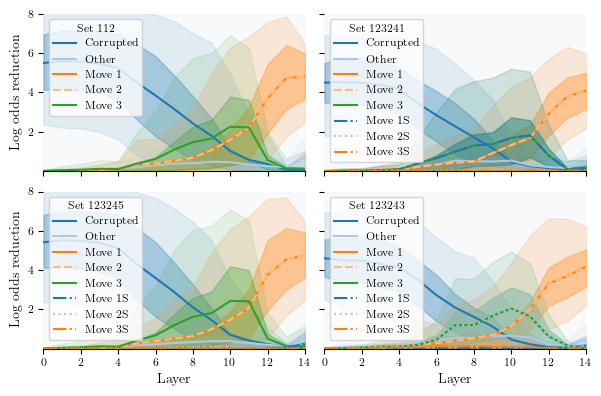

<Figure size 640x480 with 0 Axes>

In [5]:
possibilities = [('s', possibility) for possibility in study.get_possibility_list('s', lengths=[3]) if possibility[1] == possibility[3] != possibility[5]]
possibilities = [('n', '112')] + possibilities
study.plot_residual_effects_grid(possibilities, y_max=8, n_cols=2, filename="paper_residual_effects_3S_112")

## Attention heads

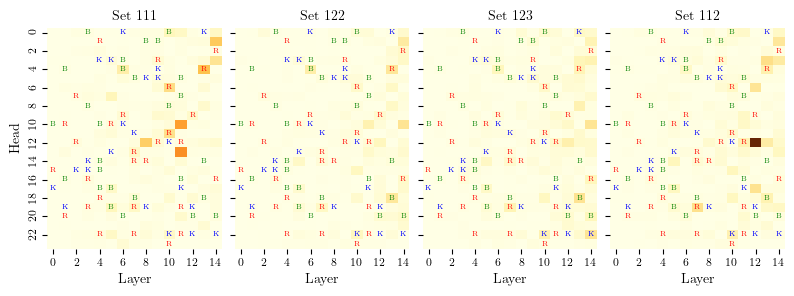

<Figure size 640x480 with 0 Axes>

In [7]:
possibilities = study.get_possibility_list('n', lengths=[3])
study.plot_attention_grid('n', possibilities, n_cols=4, vmax=0.73, filename="paper_attention_heads_3")

# L12H12

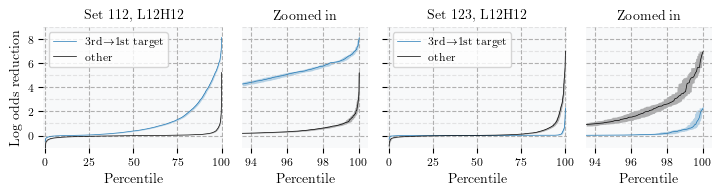

In [4]:
ablation_study = AblationStudy(folder_name="")
ablation_configs = [
    ('L12H12', "112"),
    ('L12H12', "123")
]
ablation_study.plot_ablation_effects_grid(ablation_configs, n_cols=2, filename="paper_ablation_effects_3")

# Fifth move analysis

## Residual stream

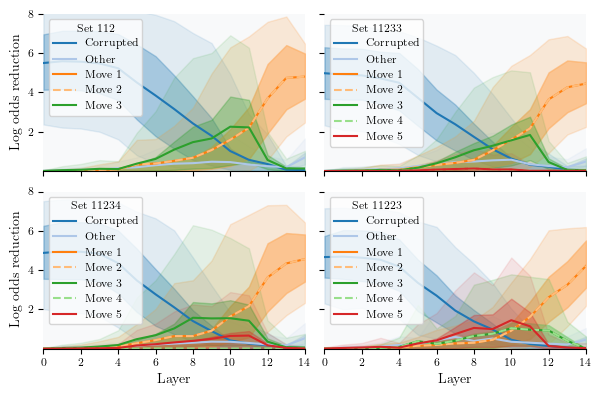

<Figure size 640x480 with 0 Axes>

In [24]:
study = FifthMoveStudy(load_all=False)
possibilities = [possibility for possibility in study.get_possibility_list('n', lengths=[5]) if len(set([possibility[0], possibility[2], possibility[4]])) == 3 and possibility[:3] == '112']
possibilities = ['112'] + possibilities
study.plot_residual_effects_grid('n', possibilities, y_max=8, n_cols=2, filename="paper_residual_effects_5_112")

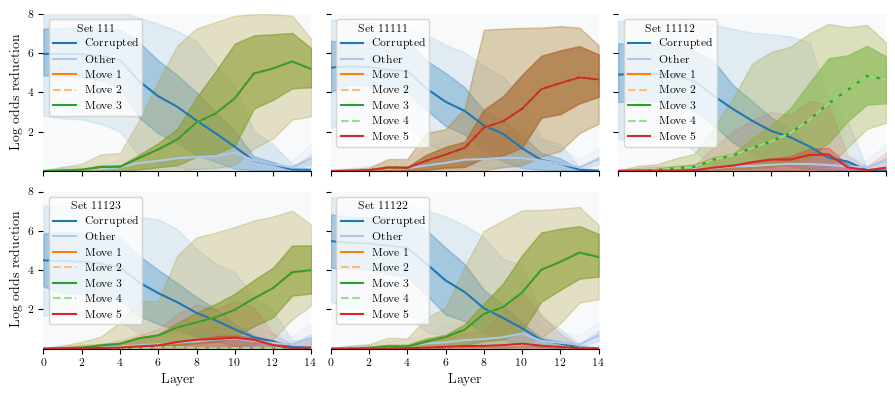

<Figure size 640x480 with 0 Axes>

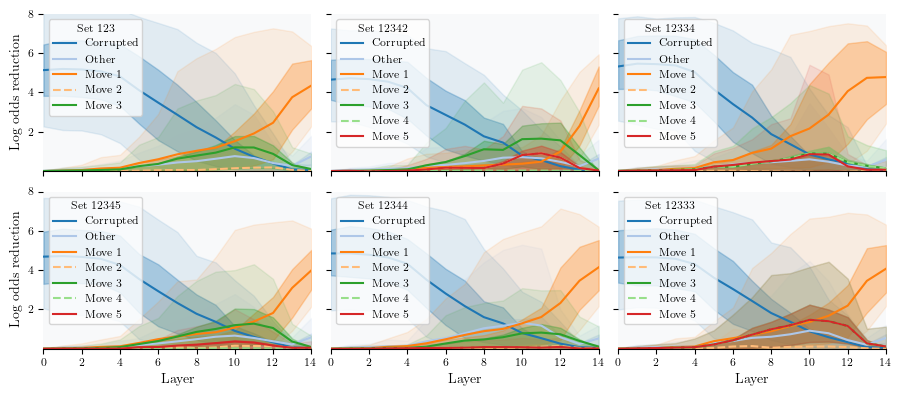

<Figure size 640x480 with 0 Axes>

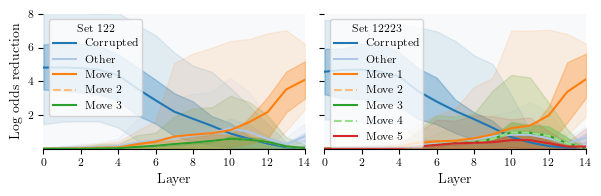

<Figure size 640x480 with 0 Axes>

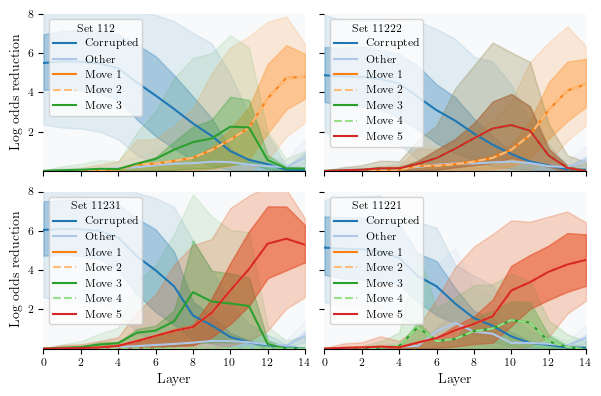

<Figure size 640x480 with 0 Axes>

In [6]:
possibilities = [possibility for possibility in study.get_possibility_list('n', lengths=[5]) if possibility[:3] == '111']
possibilities = ['111'] + possibilities
study.plot_residual_effects_grid('n', possibilities, y_max=8, n_cols=3, filename="paper_residual_effects_5_111")
possibilities = [possibility for possibility in study.get_possibility_list('n', lengths=[5]) if possibility[:3] == '123']
possibilities = ['123'] + possibilities
study.plot_residual_effects_grid('n', possibilities, y_max=8, n_cols=3, filename="paper_residual_effects_5_123")
possibilities = [possibility for possibility in study.get_possibility_list('n', lengths=[5]) if possibility[:3] == '122']
possibilities = ['122'] + possibilities
study.plot_residual_effects_grid('n', possibilities, y_max=8, n_cols=2, filename="paper_residual_effects_5_122")
possibilities = [possibility for possibility in study.get_possibility_list('n', lengths=[5]) if len(set([possibility[0], possibility[2], possibility[4]])) != 3 and possibility[:3] == '112']
possibilities = ['112'] + possibilities
study.plot_residual_effects_grid('n', possibilities, y_max=8, n_cols=2, filename="paper_residual_effects_5_112R")

## Attention heads

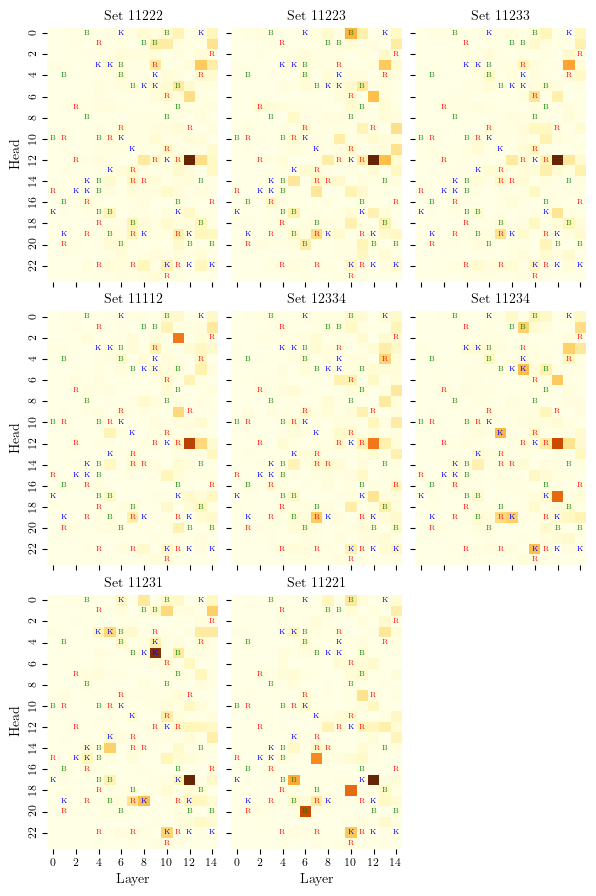

<Figure size 640x480 with 0 Axes>

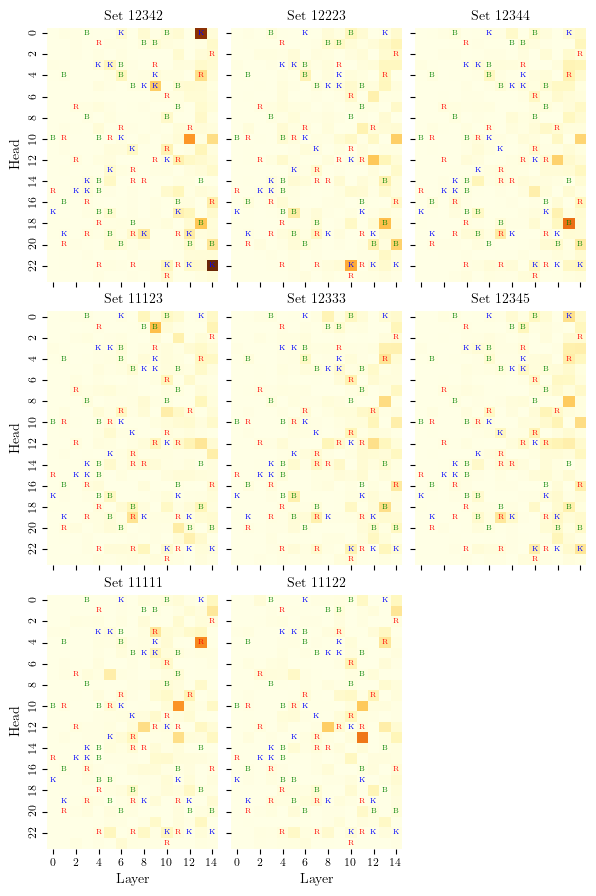

<Figure size 640x480 with 0 Axes>

In [8]:
#possibilities = study.get_possibility_list('n', lengths=[5])
# Ordering by hand
possibilities = ['11222', '11223', '11233'] #L12H12, L13H3
possibilities += ['11112', '12334'] #L12H12
possibilities += ['11234'] #L12H12, L12H17
possibilities += ['11231', '11221'] #L12H17
study.plot_attention_grid('n', possibilities, n_cols=3, vmax=0.73, filename="paper_attention_heads_5A")
possibilities = ['12342', '12223', '12344'] #random
possibilities += ['11123', '12333', '12345'] #low
possibilities += ['11111', '11122'] #L11H13, L11H10
study.plot_attention_grid('n', possibilities, n_cols=3, vmax=0.73, filename="paper_attention_heads_5B")

# L12H12, L12H17, L11H10, L11H13, L13H3

In [11]:
# ablation_configs = [
#     ('L12H12', "11222"),
#     ('L13H3', "11222"),
#     ('L12H12', "11223"),
#     ('L13H3', "11223"),
#     ('L12H12', "11233"),
#     ('L13H3', "11233"),
#     ('L12H12', "11112"),
#     ('L12H12', "12334"),
#     ('L12H12', "11234"),
#     ('L12H17', "11234"),
#     ('L12H17', "11231"),
#     ('L12H17', "11221"),
#     ('L11H13', "11111"),
#     ('L11H10', "11111"),
#     ('L11H13', "11122"),
#     ('L11H10', "11122"),
#     ('L12H12', "12223"),
#     ('L12H12', "12344")
# ]

ablation_configs = [
    ('L13H3', "11222"),
]

for config in ablation_configs:
    layer_head, puzzle = config
    layer = layer_head[1:3]  # Extract layer number
    head = layer_head[4:]    # Extract head number
    
    command = f"python3 scripts/run_single_head.py --filename interesting_puzzles_n_{puzzle} --layer {layer} --head {head} --device cuda --main"
    
    print(f"Running command: {command}")
    subprocess.run(command, shell=True)
    print("Command completed.\n")

Running command: python3 scripts/run_single_head.py --filename interesting_puzzles_n_11222 --layer 13 --head 3 --device cuda --main
Using device: cuda


100%|██████████| 3/3 [00:00<00:00,  4.40it/s]


Command completed.



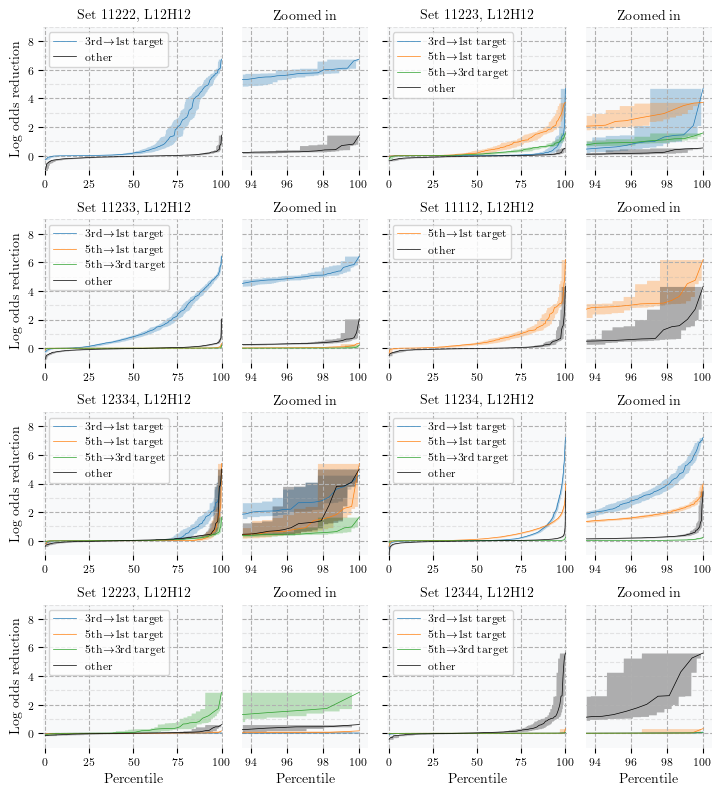

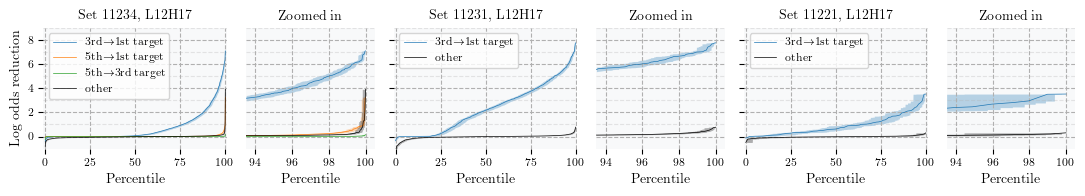

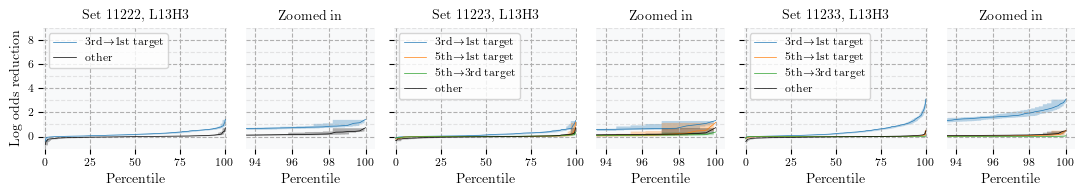

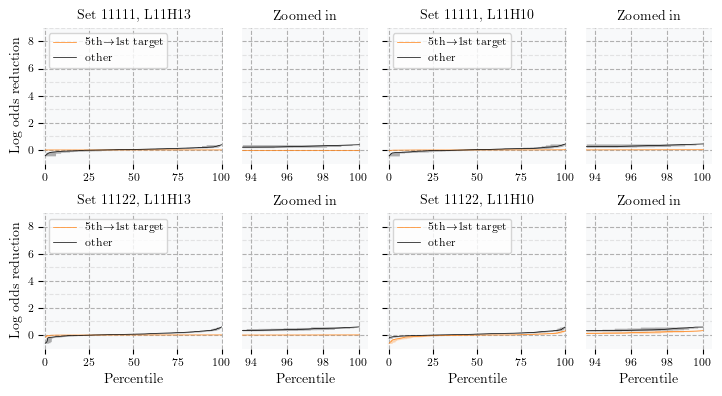

In [9]:
ablation_study = AblationStudy(folder_name="")
ablation_configs = [
    ('L12H12', "11222"),
    ('L12H12', "11223"),
    ('L12H12', "11233"),
    ('L12H12', "11112"),
    ('L12H12', "12334"),
    ('L12H12', "11234"),
    ('L12H12', "12223"),
    ('L12H12', "12344")
]
ablation_study.plot_ablation_effects_grid(ablation_configs, n_cols=2, filename="paper_ablation_effects_5_L12H12", tag='n')
ablation_configs = [
    ('L12H17', "11234"),
    ('L12H17', "11231"),
    ('L12H17', "11221")
]
ablation_study.plot_ablation_effects_grid(ablation_configs, n_cols=3, filename="paper_ablation_effects_5_L12H17", tag='n')
ablation_configs = [
    ('L13H3', "11222"),
    ('L13H3', "11223"),
    ('L13H3', "11233")
]
ablation_study.plot_ablation_effects_grid(ablation_configs, n_cols=3, filename="paper_ablation_effects_5_L13H3", tag='n')
ablation_configs = [
    ('L11H13', "11111"),
    ('L11H10', "11111"),
    ('L11H13', "11122"),
    ('L11H10', "11122")
]
ablation_study.plot_ablation_effects_grid(ablation_configs, n_cols=2, filename="paper_ablation_effects_5_remaining", tag='n')
# ablation_configs = [
#     ('L12H12', "11222"),
#     ('L13H3', "11222"),
#     ('L12H12', "11223"),
#     ('L13H3', "11223"),
#     ('L12H12', "11233"),
#     ('L13H3', "11233"),
#     ('L12H12', "11112"),
#     ('L12H12', "12334"),
#     ('L12H12', "11234"),
#     ('L12H17', "11234"),
#     ('L12H17', "11231"),
#     ('L12H17', "11221"),
#     ('L11H13', "11111"),
#     ('L11H10', "11111"),
#     ('L11H13', "11122"),
#     ('L11H10', "11122"),
#     ('L12H12', "12223"),
#     ('L12H12', "12344")
# ]
# ablation_study.plot_ablation_effects_grid(ablation_configs, n_cols=3, filename="paper_ablation_effects_5", tag='n')

## Probing

In [31]:
possibility = '12345'

command = f"python3 scripts/probing.py --filename interesting_puzzles_n_{possibility} --main --random_model --n_seeds 5 --max_goal_square 5 --min_goal_square 1 --add_opponent"

print(f"Running command: {command}")
subprocess.run(command, shell=True)
print("Command completed.\n")

Running command: python3 scripts/probing.py --filename interesting_puzzles_n_12345 --main --random_model --n_seeds 5 --max_goal_square 5 --min_goal_square 1 --add_opponent
common_str: n
Using 430 puzzles total, 301 for training.
Using device: cuda


100%|██████████| 15/15 [00:00<00:00, 25.18it/s]


Using device: cuda


100%|██████████| 15/15 [00:00<00:00, 25.14it/s]


Command completed.



185


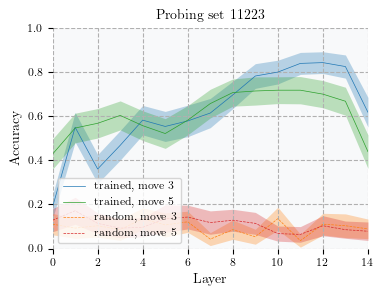

In [34]:
cases = ['11223']
for case in cases:
    probing_study = ProbingStudy(case_number=case, tag_name='n')#, add_opponent=True, start_goal_square=1)
    print(probing_study.n_examples)
    probing_study.plot_probe_results(filename="paper_probe_results_" + case)

# 7th move analysis

## Residual stream

In [38]:
study = FifthMoveStudy(puzzlename="pv7", load_all=False)

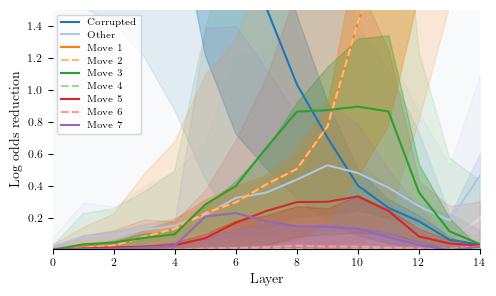

In [42]:
study.plot_residual_effects('n', '1123456', filename="paper_residual_effects_7_1123456", y_max=1.5)

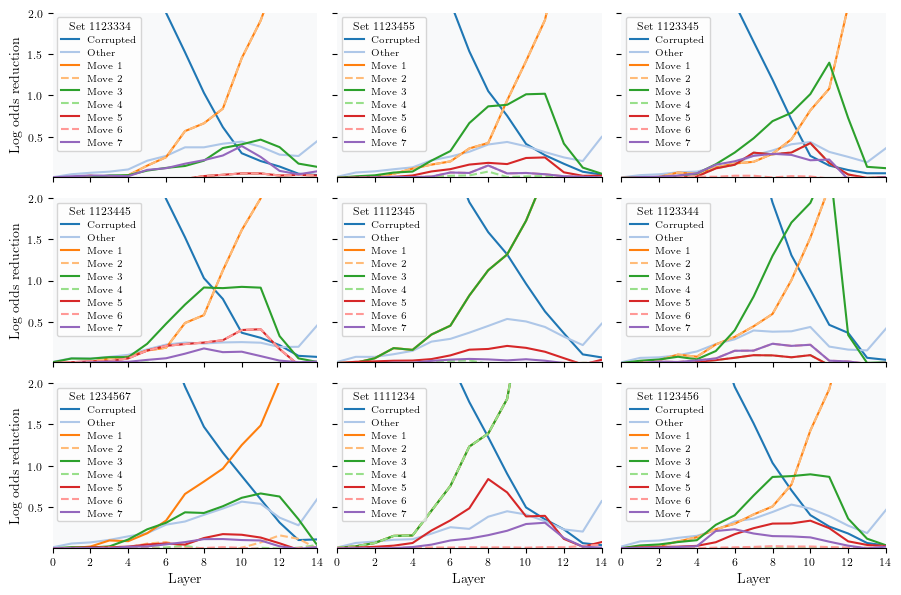

<Figure size 640x480 with 0 Axes>

In [36]:
possibilities = study.get_possibility_list('n', lengths=[7])
study.plot_residual_effects_grid('n', possibilities, n_cols=3, filename="paper_residual_effects_7", y_max=2, plot_ci=False)

## Attention heads

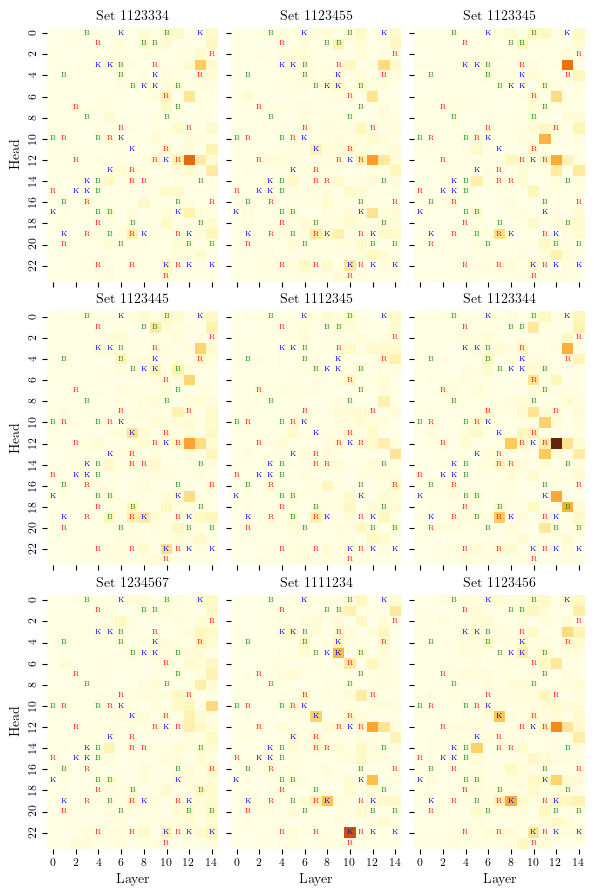

<Figure size 640x480 with 0 Axes>

In [14]:
possibilities = study.get_possibility_list('n', lengths=[7])
study.plot_attention_grid('n', possibilities, n_cols=3, filename="paper_attention_heads_7", vmax=0.73)

In [17]:
[(possibility, len(study.puzzle_sets['n'][possibility])) for possibility in possibilities]

[('1123334', 51),
 ('1123455', 224),
 ('1123345', 94),
 ('1123445', 54),
 ('1112345', 101),
 ('1123344', 223),
 ('1234567', 100),
 ('1111234', 137),
 ('1123456', 541)]

In [24]:
# import subprocess

# ablation_configs = [
#     ('L12H12', "1112345"),
#     ('L12H12', "1111234"),
# ]

# for config in ablation_configs:
#     layer_head, puzzle = config
#     layer = layer_head[1:3]  # Extract layer number
#     head = layer_head[4:]    # Extract head number
    
#     command = f"python3 scripts/run_single_head.py --filename interesting_puzzles_pv7_n_{puzzle} --layer {layer} --head {head} --device cuda --main"
    
#     print(f"Running command: {command}")
#     subprocess.run(command, shell=True)
#     print("Command completed.\n")

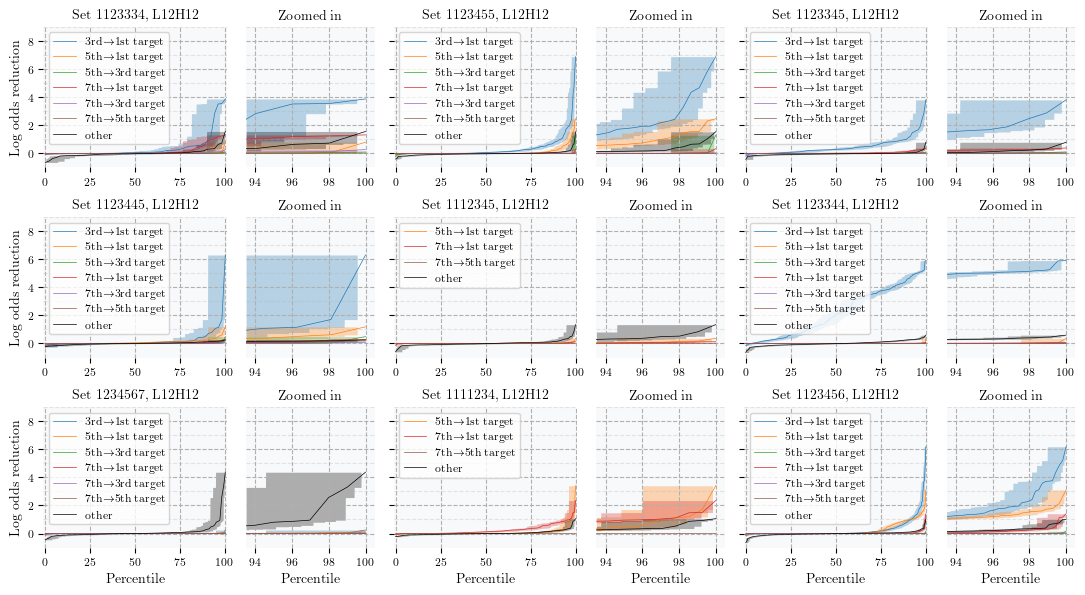

In [15]:
ablation_study = AblationStudy(folder_name="")
ablation_configs = [
    ('L12H12', "1123334"),
    ('L12H12', "1123455"),
    ('L12H12', "1123345"),
    ('L12H12', "1123445"),
    ('L12H12', "1112345"),
    ('L12H12', "1123344"),
    ('L12H12', "1234567"),
    ('L12H12', "1111234"),
    ('L12H12', "1123456")
]
ablation_study.plot_ablation_effects_grid(ablation_configs, n_cols=3, filename="paper_ablation_effects_7_L12H12", tag='pv7_n')

## Probing

In [ ]:
for possibility in possibilities:

    command = f"python3 scripts/probing.py --filename interesting_puzzles_pv7_n_{possibility} --main --random_model --n_seeds 5 --max_goal_square 7"
    
    print(f"Running command: {command}")
    subprocess.run(command, shell=True)
    print("Command completed.\n")

51


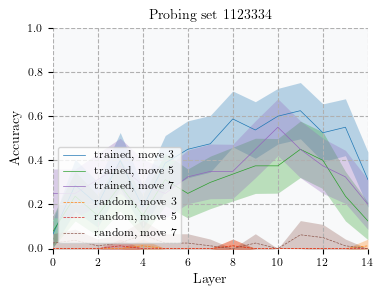

224


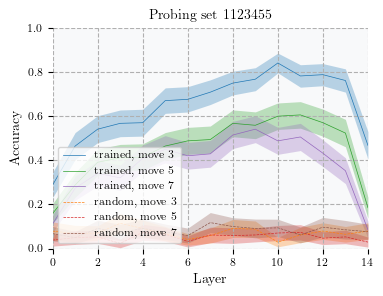

94


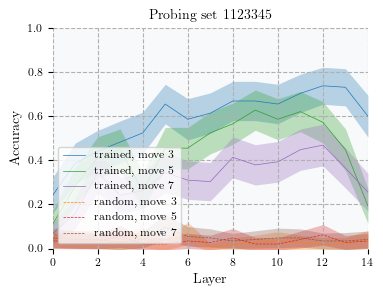

54


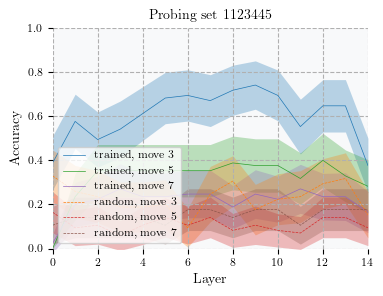

101


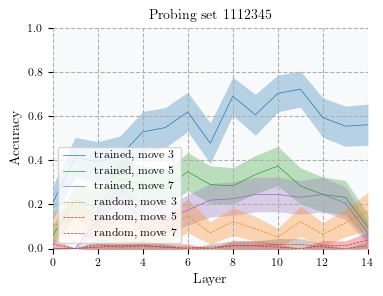

223


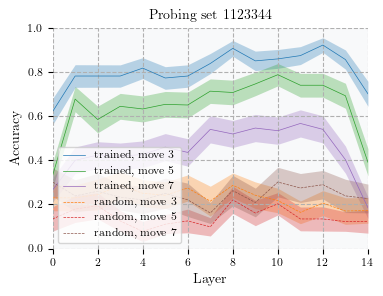

100


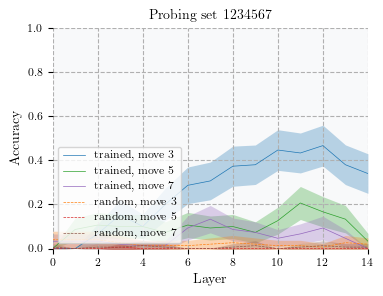

137


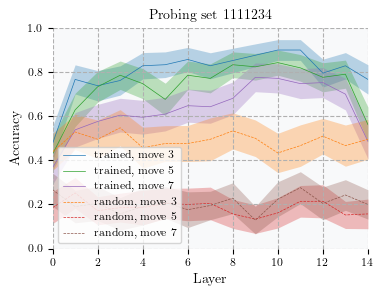

541


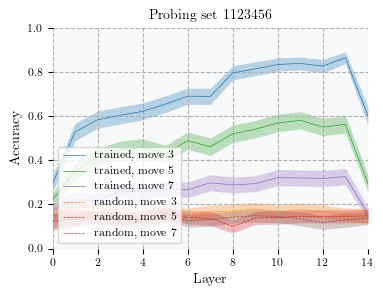

In [37]:
cases = possibilities

for case in cases:
    probing_study = ProbingStudy(case_number=case, tag_name='pv7_n')
    print(probing_study.n_examples)
    probing_study.plot_probe_results(filename="paper_probe_results_" + case)

# Double branches

In [21]:
from leela_interp.core.double_branch import DoubleBranchStudy

In [22]:
study = DoubleBranchStudy(puzzlename="nomate2", load_all=True)

123425 4 4


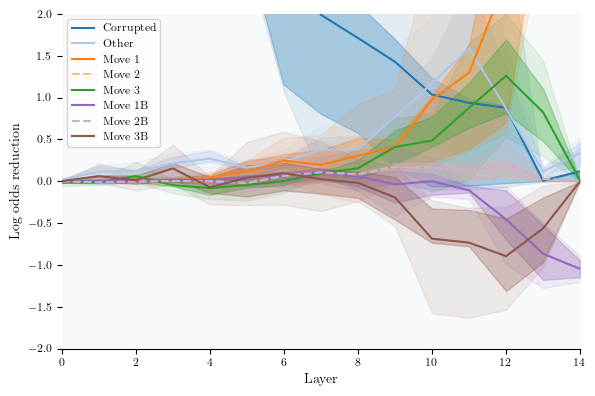

In [23]:
study.plot_residual_effects('b', '123425', filename="paper_residual_effects_123425")